In [127]:
!pip3 install seaborn

     |████████████████████████████████| 285 kB 4.0 MB/s eta 0:00:01


In [128]:
import boto3
from botocore.exceptions import ClientError
import pandas as pd
import json
import tarfile
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', None)

# pd.set_option('display.max_colwidth', -1)

In [58]:
# data = pd.read_csv('data/final_daa2.csv',lineterminator='\n')
# sample = data.sample(1000, random_state=13).reset_index()
# sample.to_csv('data/sample.csv',index=False)
# sample['Text'].to_csv('data/sample_text.csv',index=False)


In [99]:
tweets = pd.read_csv('data/sample_text.csv')
data = pd.read_csv('data/sample.csv')


In [100]:
tweets.head()

,Text
0,Im no longer a vegetarian but I do my best to keep meat consumption minimal because animal consumption (especially beef) is one of the largest drivers of climate change.
1,What happened to global warming? How r they going to be left out in the cold? U r a real
2,"""Greenland is going to be the canary in the coal mine and the canary is already pretty much dead at this point"" Ian Howat. The Arctic is at the point of no return right now. climate ClimateEmergency"
3,The final boss will be climate change. I hope its not too late.
4,The great America ignore poverty in a growing economy leaving many Homeless and with out work sustainable salaries.


In [66]:
def extract_targz(targz_file, output_path = ''):
    if targz_file.endswith("tar.gz"):
        tar = tarfile.open(targz_file, "r:gz")
        tar.extractall(path = output_path)
        tar.close()
    elif targz_file.endswith("tar"):
        tar = tarfile.open(targz_file, "r:")
        tar.extractall(path = output_path)
        tar.close()

In [89]:
output_path = 'results' 
# extract_targz('output.tar.gz', output_path)

In [90]:
input_file = output_path + '/output'
results = [json.loads(line) for line in open(input_file, 'r')]
print('Number of records in the output:',len(results))

Number of records in the output: 1002


In [91]:
results[0]

{'File': 'sample_text.csv',
 'Line': 2,
 'Sentiment': 'NEUTRAL',
 'SentimentScore': {'Mixed': 0.0028672439511865377,
  'Negative': 0.29944363236427307,
  'Neutral': 0.6850440502166748,
  'Positive': 0.012645161710679531}}

In [92]:
# This function parses sentiment data into a dataframe
def parse_sentiment(data):
    df = pd.DataFrame([item['SentimentScore'] for item in data])
    df['File'] = [item.get('File') for item in data]
    df['Sentiment'] = [item.get('Sentiment') for item in data]
    df['Line'] = [item.get('Line') for item in data]
    df.set_index('Line', inplace = True)
    
    return(df)

In [93]:
sentiment_results = parse_sentiment(results).sort_index()

In [94]:
sentiment_results

,Mixed,Negative,Neutral,Positive,File,Sentiment
Line,,,,,,
0,0.000220,0.002068,0.995343,0.002368,sample_text.csv,NEUTRAL
1,0.006156,0.018152,0.410521,0.565171,sample_text.csv,POSITIVE
2,0.002867,0.299444,0.685044,0.012645,sample_text.csv,NEUTRAL
3,0.000066,0.826803,0.166682,0.006449,sample_text.csv,NEGATIVE
4,0.010772,0.099767,0.555602,0.333859,sample_text.csv,NEUTRAL
...,...,...,...,...,...,...
997,0.000281,0.056920,0.917310,0.025489,sample_text.csv,NEUTRAL
998,0.004312,0.771456,0.134775,0.089457,sample_text.csv,NEGATIVE
999,0.000853,0.699286,0.119540,0.180321,sample_text.csv,NEGATIVE


In [96]:
df = pd.merge(tweets, sentiment_results,right_on='Line',left_index=True)

In [117]:
df.sample(5, random_state=4)

,Text,Mixed,Negative,Neutral,Positive,File,Sentiment
Line,,,,,,,
698,"Sounds good! ReadingFestival ""still a mess, but actually slightly better than previous years"" in terms of rubbish left behind. And more importantly, committing to slash CarbonEmissions by 50% by 2030",0.000670,0.251923,0.734183,0.013225,sample_text.csv,NEUTRAL
577,A Disillusioned ExxonMobil Engineer Quits to Take Action on Climate Change and Stop Making the World Worse,0.000247,0.000711,0.176913,0.822129,sample_text.csv,POSITIVE
763,The Amazon hosts the largest RainForest on the planet The lung of world can disappear in 50 years if no action is taken SGK-PLANET ClimateChange GlobalWarming ClimateEmergency ClimateCrisis Environment Sustainability ClimateAction Wood Tree,0.200953,0.444570,0.308352,0.046125,sample_text.csv,NEGATIVE
790,Interesting piece from one of the MayorsResilienceFund winners on achieving netzero in buildings. carbonneutral carbonemissions,0.000122,0.284968,0.710535,0.004375,sample_text.csv,NEUTRAL
520,It is an eerie feeling listening to news coverage of Ida while a lightning storm rolls overhead in Toronto Canada. wxtwitter ONwx ONstorm extremeweather,0.000328,0.005418,0.954675,0.039580,sample_text.csv,NEUTRAL


In [111]:
temp = pd.merge(df, data, on='Text').drop_duplicates('Text')

In [118]:
temp = temp.drop(columns=['Unnamed: 0','index','File','Tweet Id','Username'])


In [119]:
temp.head(2)

,Text,Mixed,Negative,Neutral,Positive,Sentiment,Datetime,Verified Status,Follower Count,Location,Reply Counts,Retweet Counts,Like Count,Media,Keyword,Year
0,Im no longer a vegetarian but I do my best to keep meat consumption minimal because animal consumption (especially beef) is one of the largest drivers of climate change.,0.000220,0.002068,0.995343,0.002368,NEUTRAL,2021-09-06 23:59:59+00:00,False,89.0,"East Rutherford, NJ, US",0.0,0.0,1.0,"[Photo(previewUrl='https://pbs.twimg.com/media/E-pANizXMAUvty6?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/E-pANizXMAUvty6?format=jpg&name=large')]",climatechange,2021.0
1,What happened to global warming? How r they going to be left out in the cold? U r a real,0.006156,0.018152,0.410521,0.565171,POSITIVE,2021-05-07 23:09:19+00:00,False,0.0,NaN,0.0,0.0,0.0,"[Gif(thumbnailUrl='https://pbs.twimg.com/tweet_video_thumb/E00iqWkWQAEn3DV.jpg', variants=[VideoVariant(contentType='video/mp4', url='https://video.twimg.com/tweet_video/E00iqWkWQAEn3DV.mp4', bitrate=0)])]",globalwarming,2021.0


<AxesSubplot: >

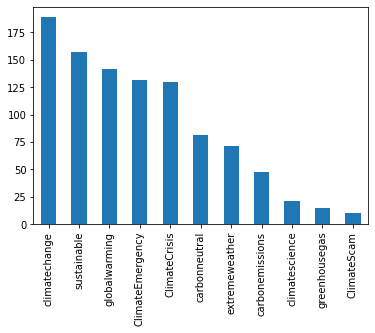

In [129]:
temp.Keyword.value_counts().plot(kind='bar')

<AxesSubplot: >

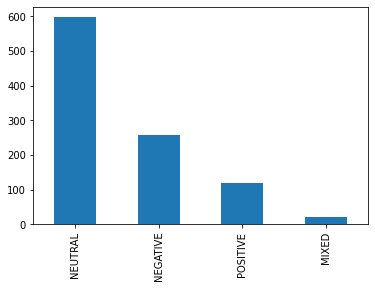

In [130]:
temp.Sentiment.value_counts().plot(kind='bar')